Exercise: build a prediction model for EP based on all features. Find R2 and MSE score on test data and training data. 
    
Dataset: http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, preprocessing, metrics, pipeline

%matplotlib inline

In [2]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


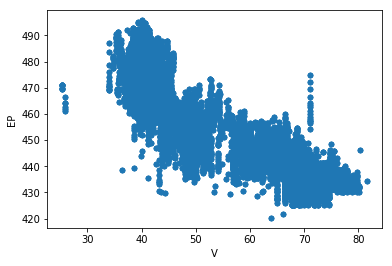

In [3]:
df.plot.scatter("V", "EP")

In [4]:
target = "EP"
X = df.copy()
del X[target]
y = np.log(df[target])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                test_size = 0.3, random_state = 1) 

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training mse:", metrics.mean_squared_error(y_train, y_train_pred), 
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred), 
      "\ntraining r2: ", pipe.score(X_train, y_train),
     "\ntesting r2: ", pipe.score(X_test, y_test))

training mse: 9.787557016553564e-05 
testing mse: 9.882808699958435e-05 
training r2:  0.9298928647544801 
testing r2:  0.9294444312957376


In [23]:
target = "EP"
X = df.copy()
del X[target]
y = np.log(df[target])
X = pd.get_dummies(X, drop_first=True)
#X = df.iloc[:, [1]]
X["V2"] = X.V ** 2

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                test_size = 0.3, random_state = 1) 

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training mse:", metrics.mean_squared_error(y_train, y_train_pred), 
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred), 
      "\ntraining r2: ", pipe.score(X_train, y_train),
     "\ntesting r2: ", pipe.score(X_test, y_test))

training mse: 9.64326405914813e-05 
testing mse: 9.728045289548598e-05 
training r2:  0.9309264184658597 
testing r2:  0.9305493216935576


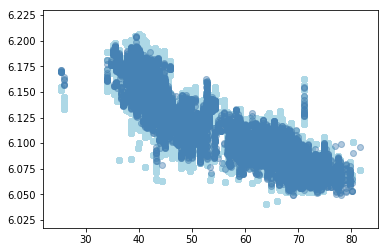

In [27]:
plt.scatter(df.V, np.log(df.EP), color = "lightblue")
EP_pred = pipe.predict(X) 
plt.scatter(df.V, EP_pred, color = "steelblue", alpha = 0.1)

In [36]:
target = "EP"
X = df.copy()
del X[target]
y = np.log(df[target])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                test_size = 0.3, random_state = 1) 

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=6, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("training mse:", metrics.mean_squared_error(y_train, y_train_pred), 
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred), 
      "\ntraining r2: ", pipe.score(X_train, y_train),
     "\ntesting r2: ", pipe.score(X_test, y_test))

training mse: 7.338095107519003e-05 
testing mse: 7.490061147097131e-05 
training r2:  0.9474380761943726 
testing r2:  0.9465267880915919


In [30]:
a = np.array([
    [3, 4, 5],
    [1, 2, 3],
    [5, -1, 0],
    [1, 5, 3]
])

In [32]:
preprocessing.PolynomialFeatures(degree=2, include_bias=False).fit_transform(a)

array([[ 3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 5., -1.,  0., 25., -5.,  0.,  1., -0.,  0.],
       [ 1.,  5.,  3.,  1.,  5.,  3., 25., 15.,  9.]])